In [3]:
#Librerías
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import random
from IPython.display import clear_output
import time
import gymLake as gymlocal
import matplotlib.pyplot as plt

In [4]:
# --Creación de Ambiente--
#env = gym.make("FrozenLake-v0")
random_map = generate_random_map(size=4, p=0.8)
env = gymlocal.FrozenLakeEnv(desc=random_map)
env.render()


SFHF
FFFF
FFFF
FFFG


In [5]:
# --Q-Table--
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)
print("action_size: ", action_size)
print("state_size: ", state_size)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
action_size:  4
state_size:  16


In [6]:
# --Hiperparámetros--
#Episodios totales
total_episodes = 10000		
#Máximo de pasos en el episodio	
max_steps = 99	
#Factor de aprendizaje	
learning_rate = 0.2 
#Factor de penalización
gamma = 0.6 		

#Parámetros de exploración
epsilon = 1.0			
max_epsilon = 1.0 			
min_epsilon = 0.01	
#Cuánto irá disminuyendo el epsilon	
decay_rate = 0.001	


y=[]
yy=[]

In [7]:
# --Q-LEARNING--
rewards = [] # Lista de recompensad

for episode in range(total_episodes):
    # Resetear ambiente
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 # Recompensa total de episodio

    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0,1)
        if exp_exp_tradeoff > epsilon:
            # Explotación
            action = np.argmax(qtable[state, :])
        else:
            # Exploración
            action = env.action_space.sample()

        
        # Devolver estado y recompensa
        new_state, reward, done, info = env.step(action)

        # Actualizar Q-table
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        #Mover nuevo estado
        state = new_state
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.01)'''
        
        
        
        # Si termina el episodio
        if done:
            break
    
    if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
    episode += 1
    if(reward < 0):
        y.append(0)
    else:
        y.append(1)
    
    yy.append(step)

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print("Score over time: " + str(sum(rewards)/total_episodes))
print(qtable)
    


Episode: 9900
Score over time: 89.6956
[[   2.28224       5.4704        5.4704        2.28224   ]
 [   2.28223999   10.784      -100.            5.47039988]
 [   0.            0.            0.            0.        ]
 [ -96.48156279   33.96164704   14.68578114   10.28483957]
 [   5.4704       10.784        10.784         2.28224   ]
 [   5.4704       19.64         19.63999998    5.4704    ]
 [  10.78362187   34.4          34.36890047  -99.99997943]
 [  19.25249133   58.99816673   33.29166472   18.72932752]
 [  10.784        19.64         19.64          5.4704    ]
 [  10.784        34.4          34.4          10.784     ]
 [  19.64         59.           58.99995402   19.63999964]
 [  34.39444519   99.99999655   58.7970287    34.27714247]
 [  19.64         19.64         34.4          10.784     ]
 [  19.64         34.4          59.           19.64      ]
 [  34.4          59.          100.           34.4       ]
 [   0.            0.            0.            0.        ]]


In [9]:
    rewards_per_thousand_episodes = np.split(np.array(rewards),total_episodes/1000)
    count = 1000

    print("******** Promedio cada 1000 episodios ********")
    for r in rewards_per_thousand_episodes:
        print(count, ": ", str(sum(r/1000)))
        count += 1000
  

******** Promedio cada 1000 episodios ********
1000 :  46.018000000000086
2000 :  92.30099999999966
3000 :  94.24899999999944
4000 :  94.78299999999925
5000 :  94.87199999999925
6000 :  94.91999999999916
7000 :  94.93599999999915
8000 :  94.96199999999914
9000 :  94.96399999999913
10000 :  94.95099999999914


**********************************************************
EPISODE  0
[[   2.28224       5.4704        5.4704        2.28224   ]
 [   2.28223999   10.784      -100.            5.47039988]
 [   0.            0.            0.            0.        ]
 [ -96.48156279   33.96164704   14.68578114   10.28483957]
 [   5.4704       10.784        10.784         2.28224   ]
 [   5.4704       19.64         19.63999998    5.4704    ]
 [  10.78362187   34.4          34.36890047  -99.99997943]
 [  19.25249133   58.99816673   33.29166472   18.72932752]
 [  10.784        19.64         19.64          5.4704    ]
 [  10.784        34.4          34.4          10.784     ]
 [  19.64         59.           58.99995402   19.63999964]
 [  34.39444519   99.99999655   58.7970287    34.27714247]
 [  19.64         19.64         34.4          10.784     ]
 [  19.64         34.4          59.           19.64      ]
 [  34.4          59.          100.           34.4       ]
 [   0.            0.            0.          

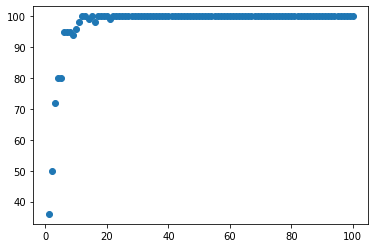

Movimientos por repeticion


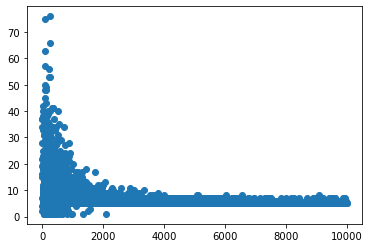

Training finished.



In [10]:
# Test

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("**********************************************************")
    print("EPISODE ", episode)
    print(qtable)
    for step in range(max_steps):
        env.render()

        action = np.argmax(qtable[state, :])

        new_state, reward, done, info = env.step(action)
        print('reward: ', reward)
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.1)'''
        if done:
            break

        state = new_state
    


#Grafica-----------------------------------------------------------------------------------------------------------

cont = 1
lenthx = 0
porcentage = 0
porcentagey = []
for i in y:
    porcentage += i
    if(cont%100 == 0):
        porcentagey.append(porcentage)
        porcentage = 0
        cont=0
        lenthx +=1

    cont+=1

print("Fallos por repeticion")
x = list(range(1, total_episodes+1))
porcentagex = list(range(1, lenthx+1))
#print('x: ', len(porcentagex), ' y: ', len(porcentagey))
fig, ax = plt.subplots()
#ax.scatter(x, y)
ax.scatter(porcentagex, porcentagey)
plt.show()
print("Movimientos por repeticion")


fig, ax = plt.subplots()
ax.scatter(x, yy)
plt.show()
print("Training finished.\n")

#------------------------------------------------------------------------------------------------------------


env.close()